<a href="https://colab.research.google.com/github/EllouziMedAmin/DSWithPytorch/blob/main/GloveWordCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch==2.1.0 torchtext==0.16.0

In [4]:
import pandas as pd
from sklearn.manifold import TSNE
import torchtext.vocab as vocab
import torch

In [5]:
glove = vocab.GloVe(name='6B', dim=100)

.vector_cache/glove.6B.zip: 862MB [02:42, 5.32MB/s]                           
100%|█████████▉| 399999/400000 [00:21<00:00, 18210.87it/s]


In [6]:
def get_embedding_vector_from_word(word):
  idx=glove.stoi[word]
  emb=glove.vectors[idx]
  return emb

In [8]:
def get_closest_words_from_word(word,n_c_words=5):
  emb=get_embedding_vector_from_word(word)
  dists=torch.norm(glove.vectors-emb,dim=1)
  idx = torch.argsort(dists)
  closest_words = [glove.itos[i] for i in idx]
  return closest_words[1:n_c_words+1]

In [9]:
get_closest_words_from_word('cat')

['dog', 'rabbit', 'cats', 'monkey', 'puppy']

In [10]:
words=[]
categories=['numbers','algebra','music','science','technologie']
df_word_cloud=pd.DataFrame(
    {
        'word':[],
        'category':[]
    }
)

In [12]:
e={}

In [14]:
for cat in categories:

  closest_words=get_closest_words_from_word(cat,n_c_words=20)
  temp=pd.DataFrame(
      {
          'word':closest_words,
          'category':[cat]*len(closest_words)
      }
  )
  df_word_cloud=pd.concat([df_word_cloud,temp])




In [17]:
df_word_cloud.head(30)

,word,category
0,number,numbers
1,though,numbers
2,instance,numbers
3,fact,numbers
4,indicate,numbers
5,moreover,numbers
6,comparison,numbers
7,figures,numbers
8,although,numbers
9,indeed,numbers


In [18]:
#now get the 100 dimension for all words
n_rows=df_word_cloud.shape[0]
n_cols=100
X=torch.empty((n_rows,n_cols))
for i in range(n_rows):
  X[i]=torch.tensor(get_embedding_vector_from_word(df_word_cloud.iloc[i,0]))

<ipython-input-18-a5d05195896c>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X[i]=torch.tensor(get_embedding_vector_from_word(df_word_cloud.iloc[i,0]))


In [19]:
X.shape

torch.Size([100, 100])

In [20]:
X

tensor([[-0.4549,  0.7088,  0.0523,  ..., -0.4229,  0.5860, -0.4241],
        [-0.2005,  0.3965,  0.4197,  ..., -0.0372,  0.1970,  0.0616],
        [ 0.0109,  0.3941,  0.2963,  ..., -0.4874,  0.4445, -0.0539],
        ...,
        [ 0.6139, -0.1291, -0.2499,  ..., -0.5131, -0.3445, -0.0244],
        [ 0.2780, -0.5111, -0.6573,  ..., -0.0907, -0.5802, -0.3480],
        [ 0.1442, -0.3068, -0.1709,  ...,  0.1968, -0.2152, -0.2767]])

tensor([-2.0048e-01,  3.9650e-01,  4.1972e-01, -2.4869e-01, -1.8809e-01,
         2.3210e-02,  1.2773e-02, -1.0152e-01,  3.3376e-01, -4.2778e-01,
        -6.6133e-03, -4.0639e-02,  4.9387e-01, -2.2051e-01,  7.1245e-02,
        -4.5311e-01, -2.4555e-01,  6.6647e-02, -8.8730e-02,  4.2404e-01,
         3.0872e-01, -1.4332e-01,  1.7546e-01,  1.7099e-03,  1.0690e-01,
        -1.3362e-01, -1.8550e-01, -7.7892e-01, -1.4670e-01, -1.3940e-01,
         1.9643e-01,  3.8688e-01, -2.6543e-01, -1.9745e-01,  3.0245e-01,
         5.6152e-01,  1.3029e-01, -2.1034e-02, -2.0259e-01, -2.7721e-01,
        -2.9965e-01, -2.7535e-01,  2.6620e-01,  7.3788e-02, -4.3032e-02,
        -4.6754e-01,  7.7579e-01, -3.6721e-01,  1.5260e-01, -7.0882e-01,
         5.0964e-01, -1.1478e-01,  3.5220e-01,  9.7889e-01,  5.9517e-02,
        -2.5459e+00, -2.5478e-01, -2.8866e-01,  1.2855e+00,  6.6514e-01,
        -1.5178e-01,  7.2769e-01,  5.2103e-02,  6.8940e-02,  7.5834e-01,
        -1.1260e-01,  4.3492e-01,  1.1862e-01,  1.8

In [24]:
tnse=TSNE(n_components=2)
X_tnse=tnse.fit_transform(X.cpu().numpy())

In [25]:
X_tnse

array([[-6.130604  ,  1.4624473 ],
       [-5.246623  ,  1.70452   ],
       [-4.5664864 ,  1.8339443 ],
       [-4.9398584 ,  1.689958  ],
       [-3.8774753 ,  1.1199598 ],
       [-4.3539553 ,  1.3708863 ],
       [-4.114744  ,  1.705966  ],
       [-6.1187406 ,  0.90090746],
       [-5.2830715 ,  1.8398587 ],
       [-4.7481756 ,  1.5155725 ],
       [-4.7024555 ,  2.1325204 ],
       [-4.708477  ,  0.9776625 ],
       [-4.106924  ,  0.3722925 ],
       [-5.476912  ,  2.0938468 ],
       [-5.46753   ,  0.23252098],
       [-5.5604815 ,  1.4667726 ],
       [-3.7148962 ,  1.082723  ],
       [-5.274676  ,  2.2401204 ],
       [-5.35608   ,  0.9957624 ],
       [-4.751802  ,  0.24336803],
       [ 3.5838082 , -1.095851  ],
       [ 1.2501315 ,  1.0964848 ],
       [ 1.7021856 , -2.1396358 ],
       [ 1.0601106 , -1.5394233 ],
       [ 0.65100056,  0.9852212 ],
       [ 3.4893434 , -0.7863529 ],
       [-0.6910131 ,  4.0641994 ],
       [ 2.0339978 ,  1.0386289 ],
       [ 1.5889308 ,

In [26]:
df_word_cloud['x']=X_tnse[:,0]
df_word_cloud['y']=X_tnse[:,1]

In [29]:
from plotnine import ggplot ,geom_text,aes

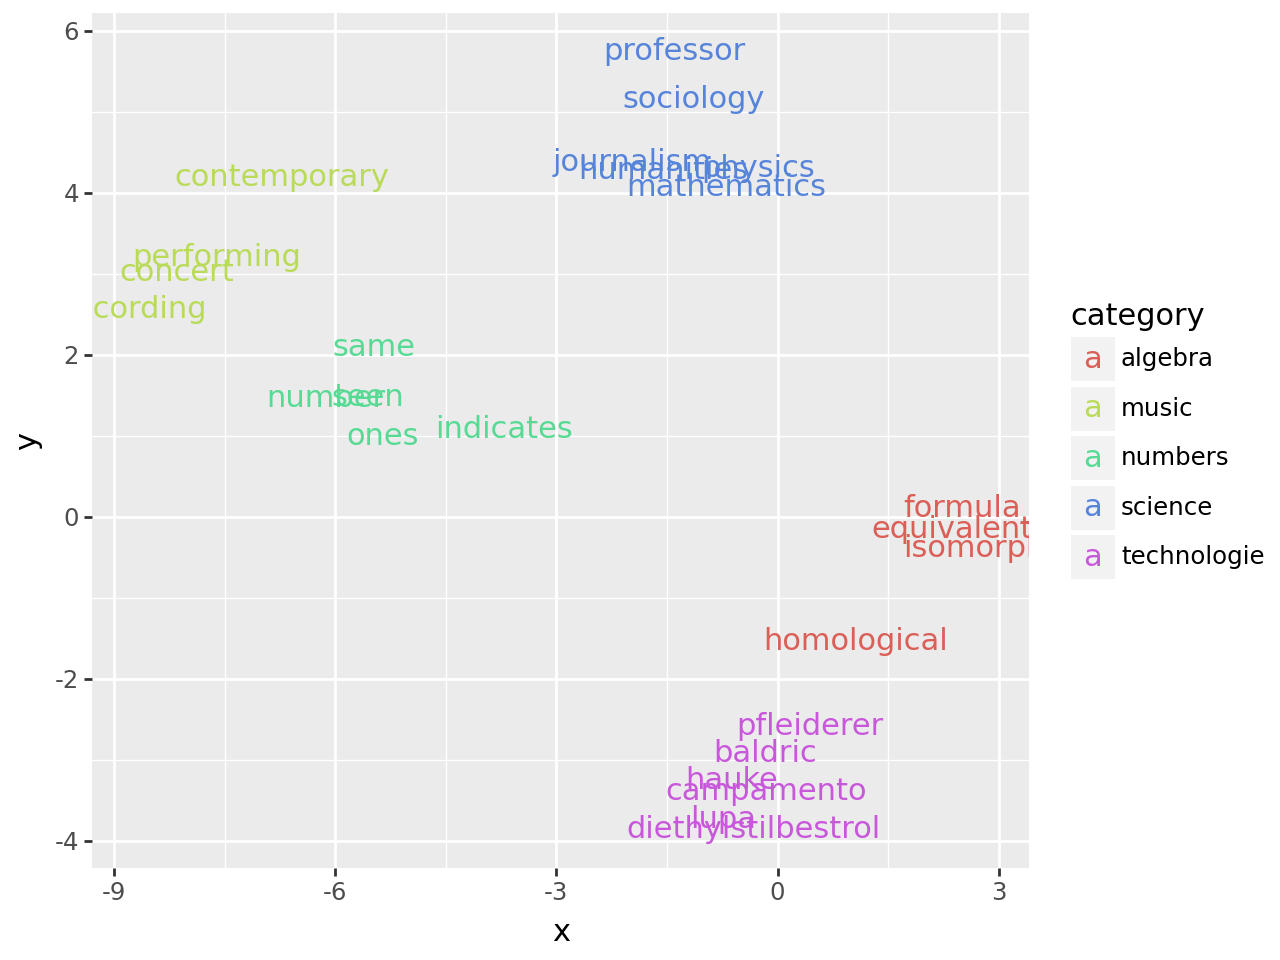

In [31]:
ggplot(data=df_word_cloud.sample(25))+aes(x='x',y='y',label='word',color='category')+geom_text()